<a href="https://colab.research.google.com/github/AadamHaq/Stock-Prediction-with-HMM/blob/main/hmm_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

In [ ]:
fileObject = open("/content/amjl.us.txt")
data = fileObject.read()
x = data.split("\n")
del x[-1]
titles = x[0].split(",")
values = [i.split(",") for i in x[1:]]
# date is not needed as each line of data is in sequential day intervals
# we will not be using 'Volume' or 'OpenInt' as features
del titles[-2:]
del titles[0]
for i in values:
  del i[0]
  del i[-2:]
int_values = []
for i in values:
  i = [float(x) for x in i]
  int_values.append(i)

print(titles)
print(int_values[0])

['Open', 'High', 'Low', 'Close']
[19.284, 20.26, 19.284, 20.237]


In [ ]:
# is this a day where the stock data is not updated?
print(int_values[5])

[20.45, 20.45, 20.45, 20.45]


In [ ]:
# if we want to use a vector of frac(change), frac(high), frac(low)
# they are rounded to 3 decimal places

vectors = []
for i in int_values:
  v = [round((i[3]-i[0])/i[0], 3), round((i[1]-i[0])/i[0], 3), round((i[0]-i[2])/i[0], 3)]
  vectors.append(v)
vectors[0:12]

[[0.049, 0.051, 0.0],
 [0.0, 0.001, 0.0],
 [0.004, 0.009, 0.0],
 [-0.025, 0.001, 0.028],
 [0.014, 0.014, 0.0],
 [0.0, 0.0, 0.0],
 [-0.01, 0.0, 0.01],
 [-0.001, 0.0, 0.001],
 [0.004, 0.004, 0.0],
 [-0.001, 0.0, 0.002],
 [-0.015, 0.0, 0.023],
 [0.029, 0.032, 0.0]]

In [ ]:
n = 5

In [ ]:
yhat[0:12]

array([1, 4, 4, 3, 1, 4, 3, 4, 4, 4, 3, 1])

In [ ]:
training = vectors[:221]
model = GaussianMixture(n_components=n)
model.fit(training)

yhat = model.predict(training)
clusters = unique(yhat)

indexes = [[] for i in range(n)]
for i in range(len(yhat)):
  indexes[yhat[i]].append(i)

def make_coords(indexes):
  v = [vectors[j] for j in indexes]
  x = [i[0] for i in v]
  y = [i[1] for i in v]
  z = [i[2] for i in v]
  return(v, x, y, z)

v1, x1, y1, z1 = make_coords(indexes[0])
v2, x2, y2, z2 = make_coords(indexes[1])
v3, x3, y3, z3 = make_coords(indexes[2])
v4, x4, y4, z4 = make_coords(indexes[3])
v5, x5, y5, z5 = make_coords(indexes[4])

In [ ]:
p = model.predict(np.array(vectors[10]).reshape(1, -1))


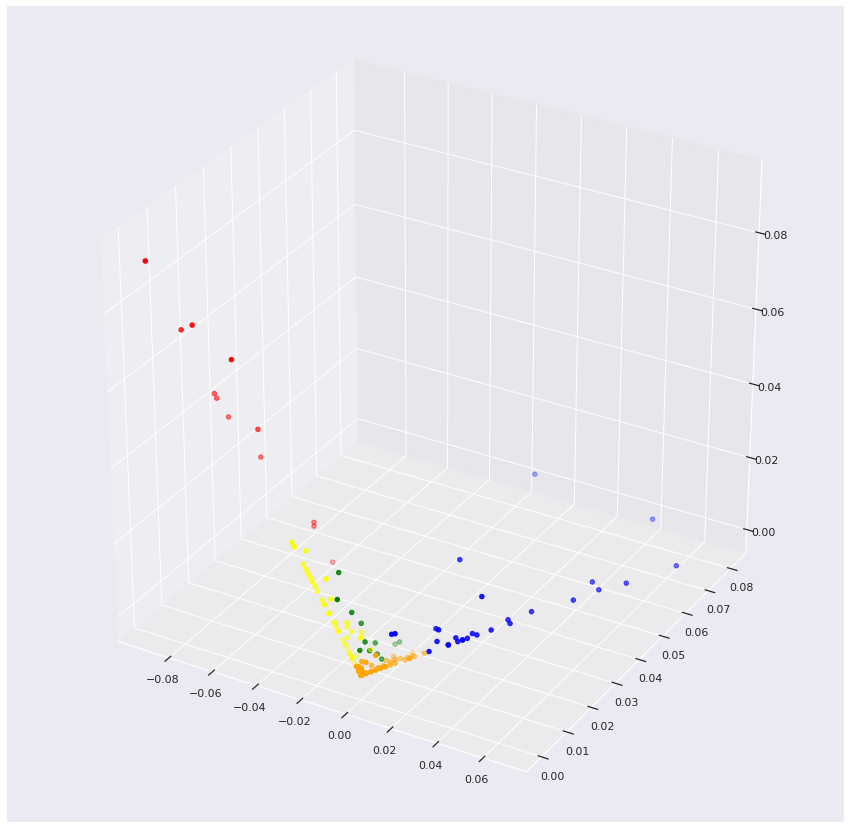

In [ ]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1,y1,z1, color="green")
ax.scatter(x2, y2, z2, color="blue")
ax.scatter(x3, y3, z3, color="red")
ax.scatter(x4, y4, z4, color="yellow")
ax.scatter(x5, y5, z5, color="orange")
plt.show()

In [ ]:
# find model parameters

training_states = yhat

distribution = [list(training_states).count(i)/len(training_states) for i in clusters]
print(distribution)

[0.05429864253393665, 0.12669683257918551, 0.05429864253393665, 0.2171945701357466, 0.5475113122171946]


In [ ]:
# transition probability matrix

ngrams = []
for i in range(len(training_states) - 1):
  ngrams.append([training_states[i], training_states[i+1]])

gram_counts = [[] for i in range(n)]
for i in ngrams:
  gram_counts[i[0]].append(i[1])

def transition(state):
  probabilities = []
  for i in range(5):
    probabilities.append(state.count(i)/len(state))
  return(probabilities)

A_matrix = []
for i in gram_counts:
  A_matrix.append(transition(i))

print(np.array(A_matrix))

[[0.52631579 0.02105263 0.18947368 0.21052632 0.05263158]
 [0.16666667 0.16666667 0.33333333 0.25       0.08333333]
 [0.32653061 0.06122449 0.26530612 0.32653061 0.02040816]
 [0.41818182 0.09090909 0.21818182 0.23636364 0.03636364]
 [0.44444444 0.         0.22222222 0.33333333 0.        ]]


In [ ]:
# emission matrix
# for this, we will first try dividing the output vectors into discrete states
# first we get the ranges (min and max value for each observation)

all_x = [i[0] for i in vectors]
all_y = [i[1] for i in vectors]
all_z = [i[2] for i in vectors]

def find_boundaries(all):
  min_ = min(all)
  max_ = max(all)
  return(min_, max_)

X_lower, X_upper = find_boundaries(all_x)
print("X:", X_lower, X_upper)
Y_lower, Y_upper = find_boundaries(all_y)
print("Y:", Y_lower, Y_upper)
Z_lower, Z_upper = find_boundaries(all_z)
print("Z:", Z_lower, Z_upper)

num_change_state = -(X_lower*1000) + X_upper*1000
num_high_state = Y_upper*1000
num_low_state = Z_upper*1000
print(num_change_state, num_high_state, num_low_state)

X: -0.113 0.067
Y: 0.0 0.081
Z: 0.0 0.117
180.0 81.0 117.0


In [ ]:
# find all possible observation states
print(num_change_state * num_high_state * num_low_state)

def intervals(lower, upper):
  interval = lower
  intervals = []
  while interval <= upper + 1/1000:
    intervals.append(round(interval, 3))
    interval += 1/1000
  return(intervals)

X_ints = intervals(X_lower, X_upper)
Y_ints = intervals(Y_lower, Y_upper)
Z_ints = intervals(Z_lower, Z_upper)


possible_states = []
for x in X_ints:
  for y in Y_ints:
    for z in Z_ints:
      possible_states.append([x,y,z])
print(len(possible_states))
# might be too many empty points in the matrix

1705860.0
1751356


In [ ]:
def intervals2(lower, upper):
  interval = lower
  intervals = []
  while interval <= upper + 1/100:
    intervals.append(round(interval, 2))
    interval += 1/100
  return(intervals)

X_ints = intervals2(X_lower, X_upper)
Y_ints = intervals2(Y_lower, Y_upper)
Z_ints = intervals2(Z_lower, Z_upper)


possible_states = []
for x in X_ints:
  for y in Y_ints:
    for z in Z_ints:
      possible_states.append([x,y,z])
print(len(possible_states))
print(X_lower, X_upper)

2600
-0.113 0.067


In [ ]:
def rounding(v):
  rounded = []
  for i in v:
    r = [round(n, 2) for n in i]
    rounded.append(r)
  return(rounded)

rounded1 = rounding(v1)
rounded2 = rounding(v2)
rounded3 = rounding(v3)
rounded4 = rounding(v4)
rounded5 = rounding(v5)

In [ ]:
def emision(rounded1):
  matrixB = [0 for i in range(len(possible_states))]
  seen = []
  for i in rounded1:
    if i not in seen:
      x = possible_states.index(i)
      matrixB[x] = rounded1.count(i)/len(rounded1)
      seen.append(i)
  return(matrixB)

matrix_B = []
rounded = [rounded1, rounded2, rounded3, rounded4, rounded5]
for i in rounded:
  matrix_B.append(emision(i))

print(np.array(matrix_B).shape)

(5, 2600)


In [ ]:
# A_matrix contains transition probabilties
# matrix_B contains emission probabilities
start = training_states[-1]
print(start)

4


In [ ]:
print("Transition Matrix")
for i in A_matrix:
  print(i)

print("Emission Matrix")
for i in matrix_B:
  print(i)

Transition Matrix
[0.5263157894736842, 0.021052631578947368, 0.18947368421052632, 0.21052631578947367, 0.05263157894736842]
[0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.25, 0.08333333333333333]
[0.32653061224489793, 0.061224489795918366, 0.2653061224489796, 0.32653061224489793, 0.02040816326530612]
[0.41818181818181815, 0.09090909090909091, 0.21818181818181817, 0.23636363636363636, 0.03636363636363636]
[0.4444444444444444, 0.0, 0.2222222222222222, 0.3333333333333333, 0.0]
Emission Matrix
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# t-1 = training_states[-1]
# t = max(matrix_A[training_states[-1]])

next = A_matrix[start].index(max(A_matrix[start]))
em_next = matrix_B[next].index(max(matrix_B[next]))
v_next = possible_states[em_next]
#p = model.predict(np.array(v_next).reshape(1, -1))

v_next

[-0.0, 0.0, 0.0]